In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest 
print('All imports done.')

All imports done.


In [2]:
data = pd.read_csv("C:/Users/HP/Downloads/ML/DataSets/creditcardfraud_ds.csv") 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.drop_duplicates(keep= 'first' , inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [5]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

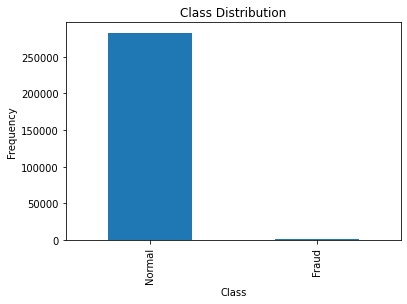

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar')
plt.xticks(range(2),['Normal','Fraud'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [7]:
normal = data[data['Class'] == 0] 
fraud = data[data['Class'] == 1]

[normal.shape,fraud.shape,data.shape]

[(283253, 31), (473, 31), (283726, 31)]

In [8]:
col = data.columns.tolist()
col = [i for i in col if i not in ['Class']]

X = data[col]
Y = data['Class']

[X.shape,Y.shape]

[(283726, 30), (283726,)]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8) 
[ X_train.shape , Y_train.shape , X_test.shape , Y_test.shape ] 

[(226980, 30), (226980,), (56746, 30), (56746,)]

In [10]:
train_normal , train_fraud = Y_train.value_counts()
outlier_fraction = train_fraud / train_normal 
outlier_fraction 

0.0016460215262547053

In [11]:
IsF = IsolationForest( max_samples= len(X_train) , contamination= outlier_fraction ) 
IsF.fit(X_train.values,Y_train.values)

IsolationForest(contamination=0.0016460215262547053, max_samples=226980)

In [12]:
def Predict(X,Y):
    X = X.values
    y = IsF.predict(X)

    y[y == 1] = 0
    y[y == -1] = 1

    print("Accuracy Score :" , accuracy_score(Y,y))
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap='RdBu_r')
    plt.colorbar(label='Anomaly Score') 
    plt.show()

    pred_scores = -1 * IsF.score_samples(X)
    plt.scatter(X[:, 0], X[:, 1], c=pred_scores, cmap='RdBu_r')
    plt.colorbar(label='Simplified Anomaly Score')
    plt.show()

Accuracy Score : 0.997651775486827


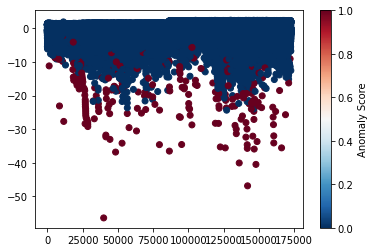

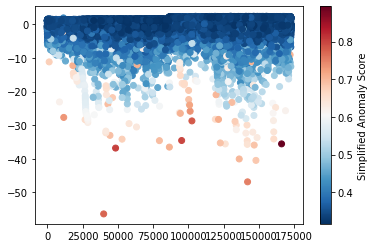

In [13]:
Predict(X_train , Y_train)

Accuracy Score : 0.9976914672399817


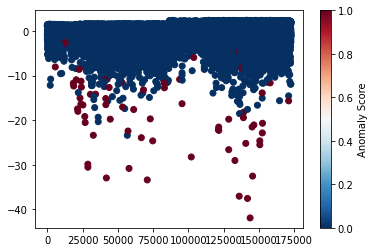

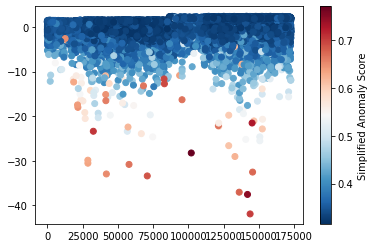

In [14]:
Predict(X_test , Y_test)